In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
iris = load_iris()

In [11]:
df = pd.DataFrame(data = iris.data, columns =iris.feature_names)
df['species'] = iris.target
# Map target integers to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


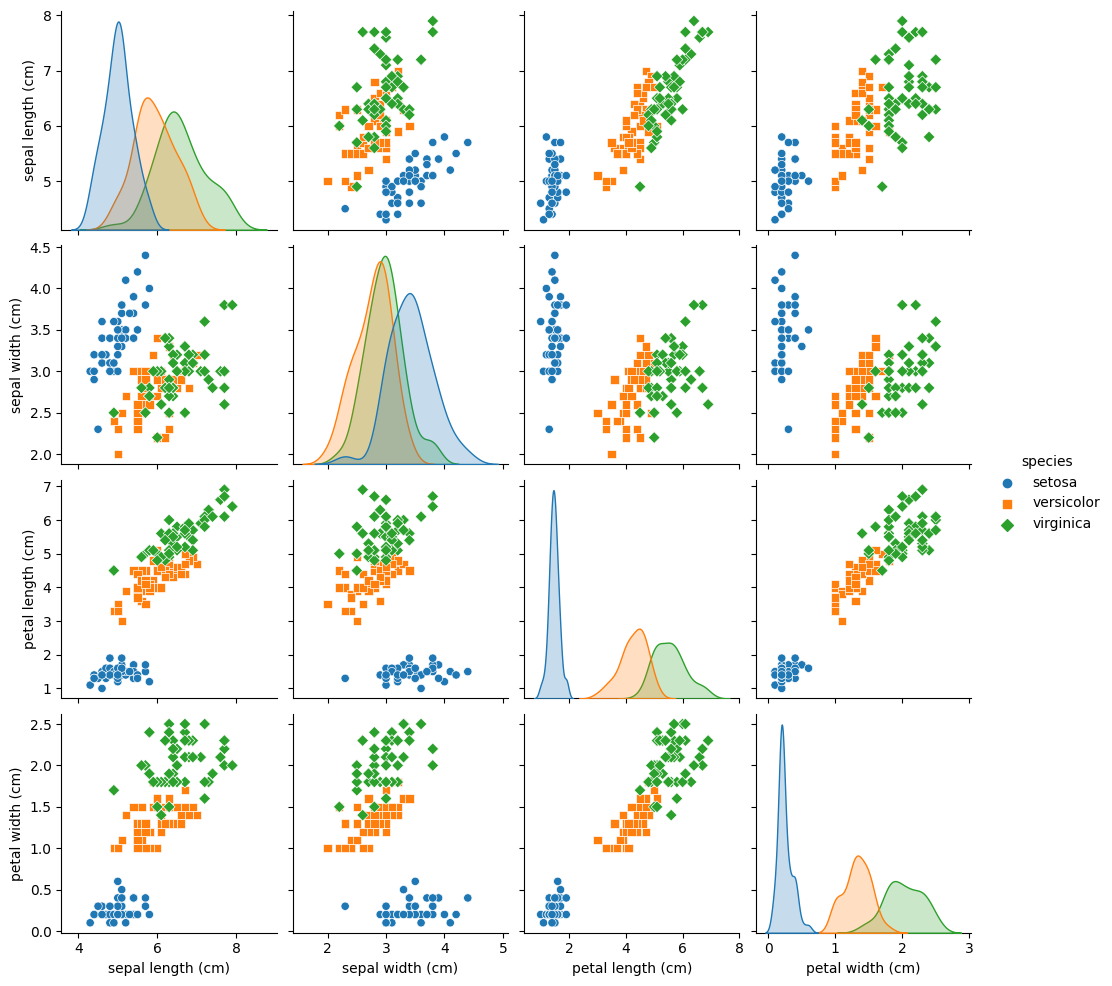

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

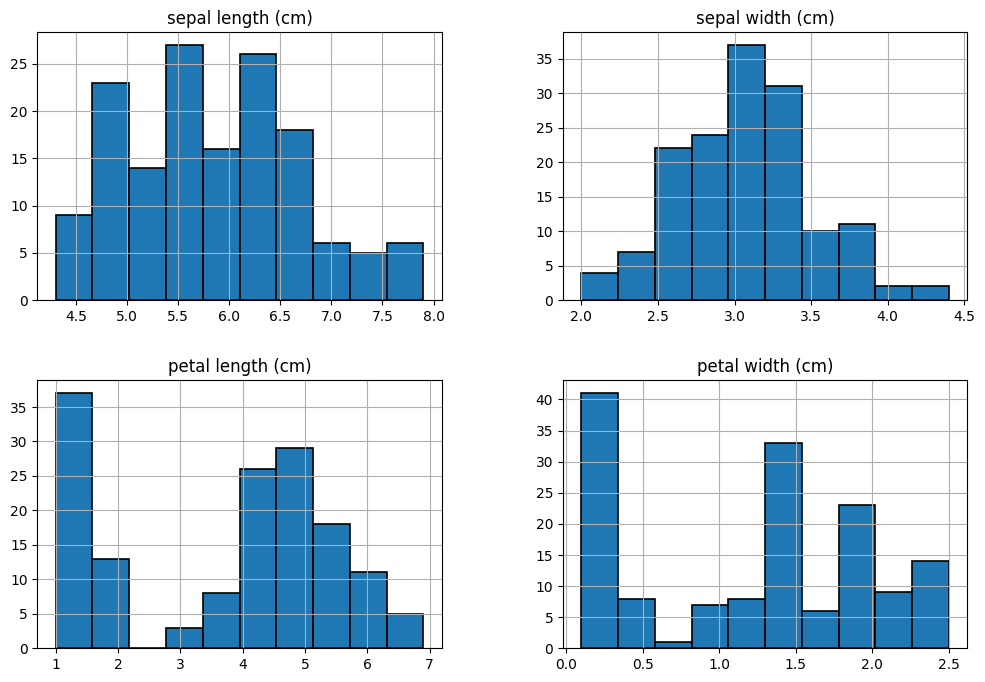

In [15]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.show()

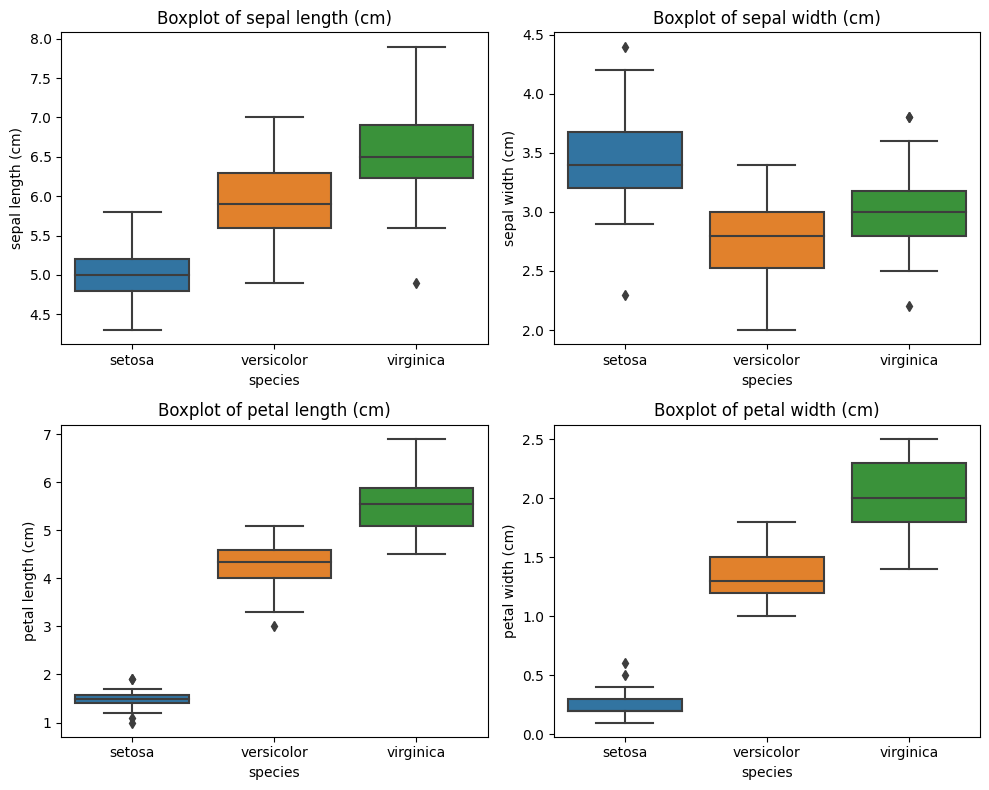

In [21]:
plt.figure(figsize=(10,8))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(2,2,i)
    sns.boxplot(x = 'species', y = column, data = df)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


FEATURE SELECTION

In [23]:
X= df.drop('species', axis=1)
y = df['species']

In [24]:
selector = SelectKBest(score_func= f_classif, k=3)
x_new = selector.fit_transform(X,y)

In [26]:
type(x_new)

numpy.ndarray

In [ ]:
# Get columns to keep and create a new DataFrame with those only
cols = selector.get_support(indices=True)
features_df_new = df.iloc[:,cols]